# Trabajo en clase 02: t-student y aceleración de la gravedad

## Yennifer Angarita Arenas
## Alejandro Mesa Gómez

A partir de las 30 medidas del tiempo que demora caer un objeto de una altura (medida con su respectiva incertidumbre) hacer lo siguiente:

# 1.  
Con 5 medidas determinar el tiempo y su error estándar. Para sigma, tres sigma y t-student (alfa=1%).
# 2.
Hacer el análogo a 5 experimentos de 5 medidas cada uno. Determinar el promedio de cada experimento. A los 5 datos de los promedios, suponiendo una distribución normal determinar el promedio y el error estándar para 3sigma.
# 3.
Con las 30 medidas determinar el tiempo y su error estándar. Reportar con 3sigma.
# 4.
Determinar usando propagación de errores (recuerde que la medida de la altura tiene error) la aceleración de la gravedad. Reporte tres valores correspondientes al tiempo con 5 medidas(t-stduent), con 5 experimentos (3sgima), y con 30 medidas (3sgima).

In [2]:
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

# Estudio preliminar de los datos obtenidos



In [54]:
tiempos=np.loadtxt('data.csv')

#conversion de milisegundos a segundos 
tiempos/=100
#print 'tiempos [s]: ',tiempos

#calculo de las velocidades

#gravedad=2.0*2.0/(tiempos*tiempos)

#print 'velocidad [m/s]: ',velocidad

mediat = np.mean(tiempos) # Comando directo de python
devstdt = np.std(tiempos)
#clasest = int(np.sqrt(tiempos.size))
clasest=6

histt, binst = np.histogram(tiempos,bins=clasest)

print('El promedio de tiempo de caida es de %.3f s' % mediat)
print('La desviación estándar del tiempo es %.3f s' %devstdt)
print '------------------------------------------------------'
print histt
print binst

El promedio de tiempo de caida es de 0.451 s
La desviación estándar del tiempo es 0.072 s
------------------------------------------------------
[ 2  4  8 12  3  1]
[ 0.29        0.34666667  0.40333333  0.46        0.51666667  0.57333333
  0.63      ]


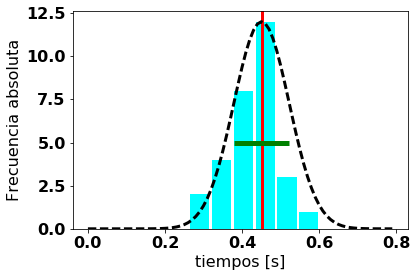

In [56]:
# Medidas de longitud
plt.subplot(1,1,1)
plt.bar(binst[0:6],histt,width=0.05,color='cyan')
plt.axvline(mediat,linewidth=3, c="red")
plt.plot([mediat-devstdt, mediat+devstdt], [5, 5], linewidth=5, linestyle="-", color="green",
         solid_capstyle="butt")

t=np.arange(0,0.8,0.01)
ft =12.*np.exp(-(t-mediat)**2/(2*devstdt**2))
plt.plot(t, ft, 'k--', linewidth=3)
plt.xlabel('tiempos [s]')
plt.ylabel('Frecuencia absoluta')

plt.show()

In [ ]:
#datos experimentales
incerteza = 0.001
acelT = 977. # aceleración teórica en Medellín m/s^2
dist = 200. # altura en m
datost = np.array(tiempos[10:15]) # tiempo en segundos
acel = 2*dist/datost**2 # Aceleraciones experimentales

aux = stats.t.interval(1-incerteza,5-1,loc=0,scale=1)
valor_t = aux[1] # corrección de t-student
acelP = np.mean(acel) # Aceleración promedio
acelSTD = np.sqrt(np.var(acel,ddof=1)) # Desv estándar de la muestra
error = valor_t*acelSTD/np.sqrt(datost.size)

print('La aceleración de la gravedad teórica es %.f m/s^2' %acelT)
print('La aceleración experimental con una incerteza del %.2f porciento es %.f +/- %.f en m/s^2' % (incerteza*100,acelP,error))
print('Es decir, en el intervalo (%.f , %.f) m/s^2' % (acelP-error,acelP+error))
print('valor t = %.4f ' %valor_t)
#print datost.size

In [ ]:
# tres sigma
error3s =  3.0*acelSTD/np.sqrt(datost.size)
print('El error considerando 3 sigma está en el intervalo (%.f , %.f) cm/s^2' % (acelP-error3s,acelP+error3s))